# PHÂN TÍCH CẢM XÚC VỚI LSTMs

- Điểm:
- Nhận xét:

## Dẫn nhập

### Giới thiệu bài toán
Trong thực trạng nhiều công ty thương mại điện tử phát triển nở rộ ngày nay, việc thu thập đánh giá từ các bình luận của người dùng là rất cần thiết. Các bình luận này có chứa nhiều thông tin quan trọng, có thể giúp các trang web dễ dàng lọc, đề xuất các mặt hàng, địa điểm phù hợp với từng người dùng và đánh giá chất lượng sản phẩm cũng như dịch vụ của các đối tác.

Với số lượng bình luận từ hàng nghìn tới hàng trăm nghìn, việc phân loại các bình luận từ người dùng không phải là điều dễ dàng, và đòi hỏi rất nhiều nhân lực. Cụ thể ở đây, ta quan tâm đến cảm xúc (tích cực/tiêu cực) gắn liền với các bình luận, từ đó suy ra cảm nhận của người dùng và đánh giá chất lượng các sản phẩm.

Cùng sự phát triển của AI và các phương pháp machine learning, hiện nay chúng ta có thể giải quyết bài toán này bằng các mô hình Deep Learning với độ chính xác có thể sánh ngang với khả năng đọc hiểu của con người.

Trong bài tập này, ta sẽ tập trung vào phân tích các bình luận tiếng Việt để tìm ra cảm xúc được thể hiện trong bình luận.
![](https://drive.google.com/uc?export=view&id=16m7rYwl40I0CBJKWlu44CyAXEMflcF9R)
![](https://drive.google.com/uc?export=view&id=1MSEwafiJ7hIoRD4QEzL5umCK8FqlAojN)


### Hướng giải quyết bài toán

Ta sẽ dùng mạng **LSTM** (Long Short-Term Memory) để giải quyết bài toán **Sentiment Analysis**  (phân tích cảm xúc) trên dữ liệu văn bản.

Đầu vào nhận được là một văn bản.

Đầu ra cần trả về là loại cảm xúc được thể hiện trong văn bản: tích cực, tiêu cực, hay trung lập (positive - negative - neutral). Trong phạm vi của bài tập này, chúng ta chỉ quan tâm đến hai cảm xúc positive và negative.

![caption](https://drive.google.com/uc?export=view&id=1cg-W4IXMKP9jfpCcADKXqXwpgEV19I-f)

### Hướng dẫn làm bài
Ở bài tập này, các bạn sẽ được yêu cầu hoàn thành phần code cần thực hiện ở các mục TODO. Ở mỗi mục TODO sẽ có các code cell. Trong đó, các bạn sẽ code phần đáp án của mình giữa 2 phần:
```python
### START CODE HERE ###
<phần bài làm>
### END CODE HERE ###
```

### Cách đánh giá mô hình
Mô hình luyện được sẽ được đánh giá trên tập dữ liệu gồm 3000 bình luận (được giấu nhãn) với độ đo F1 score.

Các bạn nộp dự đoán của mình qua [Kaggle](https://www.kaggle.com/c/vietai-f7-assignment-4)

### Cách tính điểm

Điểm tổng của bài tập sẽ là:
$$
Score = solution\times{70\%} + test\_score \times{30\%}
$$
Trong đó:
- solution: điểm của phần bài tập được hoàn thành dưới dạng các TODO (thang điểm 100)
- test_score: điểm trên leaderboard của Kaggle, sẽ được so sánh với  baseline model (mô hình mức cơ sở) (thang điểm 100)

## Hướng giải quyết bài toán

### Tập dữ liệu

Trong assignment này, chúng ta sử dụng tập dữ liệu review trên trang web Foody với khoảng 30,000 mẫu được gán nhãn, trong đó có khoảng 15,000 mẫu positive và 15,000 mẫu negative (Nguồn: https://streetcodevn.com/blog/dataset).

Tập dữ liệu này có thể được tải bằng đoạn code bên dưới:

In [ ]:
# Tải data
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id='1eoMIeJoIdITRsW94IwyAx4O2sDZprBSW', dest_path='./assignment4-data.zip', unzip=True)

Cấu trúc của folder vừa tải xuống:

In [ ]:
data_dir = 'Assignment4'
!ls {data_dir} #Các lệnh bắt đầu bằng ! trong colab code cell tương đương các lệnh chạy trực tiếp trên terminal

sample_submission.csv  test.csv  train.csv  words_list.npy  word_vectors.npy


Trong đó:
- **train.csv**: file csv chứa 27,000 mẫu dữ liệu đã gán nhãn
- **test.csv**: file chứa 3000 mẫu test giấu nhãn, dùng để dự đoán và nộp kết quả lên kaggle
- **sample_submission.csv**: file mẫu thể hiện hình thức nộp kết quả
- **word_list.npy**: chứa danh sách các từ tiếng Việt đã xử lý
- **word_vectors.npy**: chứa vectors  biểu diễn các từ trong **word_list.npy**

### Phân tích bài toán dưới góc nhìn Word Vectors


Nếu như chúng ta giữ nguyên định dạng kí tự của văn bản đầu vào thì rất khó để thực hiện các thao tác toán học, như tính tích vô hướng (dot product) , đưa vào hàm softmax, hay các thuật toán trên Neural Net như backpropagation.

Vậy nên, thay vì sử dụng chuỗi kí tự, ta sẽ thay đổi  định dạng của văn bản đầu vào bằng các vector biểu diễn, để thuận tiện cho việc tính toán.

![Word2Vec](https://drive.google.com/uc?export=view&id=12xKP6pFzDzj-0ToZX-27RjOhRcMFrfeb)

Trong hình minh hoạ ở trên, dữ liệu đầu vào là câu "Tôi ăn ... rồi" với tổng cộng 16 từ. Giả sử ta có thể mã hóa mỗi tiếng thành một vector D chiều, ví dụ như:

```
Tôi = [0.2, 0, 0.8, 0.5,]
ăn = [0, 0.6, 0.3, -0.1]
rồi = [0.5, 0.2, 0.1, -0.7]
với D = 4
```

Vậy, cả câu "Tôi ăn ... rồi" có thể được biểu diễn bằng một ma trận 16*D chiều.
```
[[0.2, 0, 0.8, 0.5]
[0, 0.6, 0.3, -0.1]
.
.
.
[0.5, 0.2, 0.1, -0.7]]
```

Để ánh xạ từ một **từ** sang một **vector**, chúng ta sử dụng một bộ vector biểu diễn từ đã được chuẩn bị sẵn.

### Import các thư viện cần thiết

In [ ]:
import os
import sys
import time
import datetime
import math

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

In [ ]:
tf.__version__

'2.4.1'

## Chuẩn bị dữ liệu huấn luyện

### Tải dữ liệu
Sau đây ta tiến hành tải dữ liệu từ file `train.csv`

In [ ]:
pd.options.display.max_colwidth=1000
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
train_df.head()

,id,text,class
0,dee6dfc5,"Đến quán 2 lần thôi , rất là thích !\nQuán tuy nằm trong hẻm nhưng rất dễ tìm , quán rộng_rãi thoáng mát sạch_sẽ .\nNhân_viên phục_vụ nhiệt_tình , siêu dễ_thương .\nThực_đơn phong_phú đa_dạng , giá siêu rẻ .\nThức_ăn nêm nếm hợp_khẩu vị , ngon_miệng .\nDesert ngọt vừa , không quá ngấy , rất ngon .\nTrà sữa , uyên_ương thơm và đúng vị mình đã từng uống ở HongKong .\nNói_chung điểm 10 cho chất_lượng , thích quán lắm !",1
1,800813f5,Đến quán vào tối chủ_nhật . Có band hát . Khá ổn . Tuy_nhiên không_gian tầng 1 hơi hẹp . Ngồi cả ra vỉa_hè . Đồ uống ko ngon lămz,0
2,6553e47f,Phục_vụ lâu quá mặc_dù khách rất vắng .\nĐợi gần 15p mới mang được ly cà_phê ra . Ông này chỉ khéo quảng_bá chứ với mình chắc không quay lại_nữa .,0
3,b45a1ff1,"Ko gian bé_tí , quán chật_chội , đông người nên phục_vụ chưa tốt . Đồ uống bình_thường ( đặc_biệt khi so với giá_cả ) và ko có gì đặc_sắc cả .",0
4,f92694b0,"Khi mình order , đặt bánh thì nhận được sự tiếp_đãi , tư_vấn và nói_chuyện rất gần_gũi , rất nhiệt_tình .\nBánh thì rất tuyệt , nhân béo , rau_câu không dùng phẩm . Sau_này có dịp sinh_nhật , mình sẽ order mẫu lớn .\nChúc các bạn làm_ăn phát_đạt !",1


In [ ]:
print('Number of train samples in total:', len(train_df))

Number of train samples in total: 27000


In [ ]:
print('Number of positives:', np.sum(train_df['class']==1))
print('Number of negatives:', np.sum(train_df['class']==0))

Number of positives: 13518
Number of negatives: 13482


Dữ liệu gồm 3 cột: `id`, `text` và `class`. Trong đó:
- `id`: id của mẫu dữ liệu
- `text`: dữ liệu văn bản, đã được tiền xử lý để gộp từ và dấu câu
- `class`: nhãn của dữ liệu, 1 là positive, 0 là negative

Để giúp hiểu rõ hơn về dữ liệu, ta có thể hiển thị một số review bất kỳ như sau. Các bạn có thể thử chạy các code cell ở dưới nhiều lần để thấy sự đa dạng của các bình luận trong tập dữ liệu (về độ dài, cách gõ, hành văn, ngôn từ, *vân vân*)

5 review tích cực

In [ ]:
sample_positive = train_df[train_df['class'] == 1].sample(5)
sample_positive

,id,text,class
22847,08240546,"Do ghiền chân gà muối chiên ở đây nên thường_xuyên ghé ăn . Hôm_nay quay lại dc anh chủ quán giới_thiệu 1 món siêu mới sắp dc bổ_sung trong menu luôn nha ! Nầm bò nướng ! ❤ ️\n- - Nghe_nói món này có nguồn_gốc từ miền Bắc .\nPhải nói là lúc đem ra nhìn đã hấp_dẫn rồi . 1 phần dành cho 3-4 người ăn gồm có 2 lạng bò , 2 lạng vú đầy ụ cái đĩa , xung_quanh thì nấm hải_sản nấm_hương nấm kim châm , đậu_bắp . Cà_tím ... Cái gì cũng nhiều\n- - Nhân_viên sẽ set up 1 bếp ga , đợi bếp nóng cho bơ vào và nướng .\nNước_chấm cho món này là nước sốt me nha .\n- - - Bò siêu mềm , ướp rất vừa_miệng . Nấm nướng thì lần đầu_tiên mới ăn , thơm cực , ghiền luôn ! Trời mùa này lạnh lạnh mà đi ăn món này thì tuyệt_vời .\n- - - Giá_cả : phần 2 người ăn 145k , phần 3-4 người ăn 195k , mình cảm_thấy kêu phần_lớn sẽ lợi hơn nhiều .\n- - - Nói_chung là dc thử món mới lại ngon thích quá đi , ko uổng công bé làm chuột_bạch = ) )",1
8847,5f6d0201,"Mình đi_ở đây đã ba lần và nói thật_là mình nghiện quân r : 3 Không_gian rất thanh_nhã và ấm_cúng , mùi trà , mùi kem bánh hoà_quyện làm bầu_không_khí có mùi thơm thoang_thoảng + ngọt_ngào . Chỗ ngồi nào nhìn cũng đắt địa hết ak : p Ngồi đâu thì cũng có cái để ngắm , thứ để chụp và đủ riêng_tư để trò_chuyện cùng nhau , đọc sách , làm_việc hay học_tập . Trà ở đây thì siêu cấp ngon rồi , cái đó không cần bàn_cãi : p Bánh cũng ngon nữa : v Mà cái nào cũng đáng_giá hết ak : 3 Luôn có_thể lựa_chọn nhiều loại bánh nak , trà cũng nhiều loại nữa , cứ thấy mùi nào mình thích thì chọn thôi : 3 Uống hết bình 1 bạn cũng có_thể xin thêm nước cho vào bình trà , chờ nước trà dc chiết ra tiếp để dùng tiếp nữa : 3 Chung là đã đi thì chắc_chắn sẽ ghiền và muốn quay lại : ) Ah quên nữa : p Quán nào trong một chung_cư theo kiểu khá cũ giữa lòng Sài_Gòn nhưng khu đó chụp ảnh này_nọ cũng đẹp lắm và cũng có nhiều shop quần_áo , handmade ở đây nữa : 3",1
20769,21695928,"30.01.2016\nTrưa đói_meo mốc bạn nhỏ dắt đi ăn gần nhà .\nQuán trang_trí theo phong_cách Brazil . Màu chủ_đạo là Vàng > Xanh lá . GIống cái trạm xe_lửa . Tầng 2 quán chưa mở , đang trong giai_đoạn thi_công . Toilet không sạch lắm .\nKêu món lên chậm , trong thực_đơn cũng ghi Monster phải đợi 15 ' .\nMón lên nóng_hổi , nhân_viên có nhắc cẩn_thận cái dĩa nóng , thân_thiện . Điểm trừ là sàn chỗ mình ngồi bị đổ nước ( trước khi mình vô ) nhưng không ai lau , chắc không thấy quá .\nMonster thì tuyệt_đỉnh rồi , ngon lắm . Có thịt bò băm nhỏ nhỏ , lơ , khoai chiên lát mỏng , thơm mayonnaise , đặc_biệt là cheese siêu ngon hehe . Món thứ 2 cũng ngập cheese , ăn khoai_tây bùi_bùi , ấm nóng .\nTương ở đây ngon lắm , không phải Cholimex hay mấy loại hay ăn , tương cà cực_kì đặc_biệt luôn , mình không ăn tương cà bao_giờ nhưng ở đây lại thấy quá ổn .\nNói_chung là món ngon , nhưng khoai_tây mà giá vậy_thì hơi cao , chế_biến thì quá ổn . Thôi tạm chấp_nhận .\nĐợi giàu rồi quay lại .\nTổng thiệ...",1
19509,17385079,"Không_gian quán được trang_trí theo kiểu xưa trông nhẹ_nhàng và yên_tĩnh , không_gian vừa_phải . Mình nghĩ không_gian này sẽ phù_hợp với gia_đình hay các cặp đôi hò_hẹn . Riêng cá_nhân và nhóm bạn mình thì thấy rất thoải_mái , ngồi ở góc ban_công của quán mà cứ có cảm_giác như_là ở nhà . Đúng là hôm đó nhóm bạn mình mải_mê nói_chuyện quên cả giờ quán đóng_cửa .\nVề thức_ăn , thì mình có gọi một mâm cơm chọn sẵn ( 270.000 / mâm ) . : cá dũa chiên , thịt heo ba_chỉ , rau luộc ( quên mất tên ) , canh rong_biển , dưa bóp trộn kiểu Huế ( gọi thêm ) . Thực_sự thì món nào mình cũng thấy vừa_miệng cả . À , ở đấy không tính thêm tiền cơm khi gọi thêm nên tha_hồ mà ăn nó các bạn ạ .\n\nChủ quán rất thân_thiện và hỏi_han khách ; các em nhân_viên cũng dễ_thương và lễ_phép lắm . Vừa_mới bước vào cổng là đã được các em nhân_viên chào_đón . Trong khi chờ bạn đến , thì có_thể tranh_thủ dùng món bắp rang của quán mời . Dùng cơm xong thì mỗi khách được khuyến_mãi thêm chén chè . À dĩ_nhiên là cho đợ...",1
5951,cdfde877,"Trong tất_cả các quán chay trên địa_bàn th

5 review tiêu cực


In [ ]:
sample_negative = train_df[train_df['class'] == 0].sample(5)
sample_negative

,id,text,class
24804,59118aae,"Nhớ hồi 2 năm trước mình đi ăn_ở đây , lúc mới là sinh_viên lên Sài_Gòn học , 1 cái chỉ mới có 1k5 thôi àh , lúc đó bánh flan ở đây cũng nhiều người biết đến lắm , chiều nào quán cũng siêu đông , một phần do học_sinh ăn nhiều , 1 phần do quán bé nên lúc_nào người ăn cũng quay quần bên nhau ấm_cúng lắm . . hehe\nBánh flan dừa thì theo mình biết ở SG chỉ có 2 chỗ bán , một ở đây một ở chợ bên Q8 , bánh flan ở đây ngon , ko quá béo , ngọt thanh , dưới đáy có lớp nước_cốt dừa cắn sựt sựt đã đã , lúc chị Mười mới đưa bánh thì bạn đừng ăn vội , nên rưới cafe lên cho đều bánh , đợi tí cho lớp dừa dưới đáy đặc lại cắn mới đã . .\nHồi đó bánh chất_lượng lắm , sữa làm tươi ngon , béo ngậy , cafe cũng đặc , bây_giờ thì sữa ít hơn , cafe dảo rồi hok được đặc nữa . Ăn hơi chán hơn , giá cũng đắt hơn ( 2,5 k/cái 1 dĩa mặc_định 4 cái 10k hok bán ít hơn nha ) .\nP / s : Tánh của bà chủ này sớm_nắng_chiều_mưa nha , các bạn lại kêu cho rõ là muốn ăn bánh gì ( flan thường hay dừa , cái lớn hay nhỏ ) ...",0
21967,78d4c942,"Nghe mọi người khen nên mình cũng tìm đến nhưng_mà cuối_cùng đã ra về vì mới đậu xe đã bị dội nước_lạnh vì kiểu phục_vụ không ra_gì . Mình thi tuyệt_đối cạch mặt kiểu quán này , dù có ngon thế_nào thì cũng ko bao_giờ ghé nữa .",0
9883,4b756463,"Mình đi ăn cách đây 1-2 tháng gì đó . Vào ăn thì hình_như quán đang tân_trang dọn_dẹp gì đó để đồ_nghề trên bàn nên mình k biết ngồi bàn nào . Chị chủ quán chỉ vô cái bàn kia "" ngồi đại ở đó đi "" .\nLần đầu_tiên mình ăn_ở đây sau những ngày rầm_rộ trên foody mà thật_sự kem hông ngon . Kem ngọt gắt qá . Giá 10k/ly thì_phải nhưng trước mình ăn_ở chổ ngay siêu_thị lý thường kiệt lên tí nhìn tay_trái , kế bên cái chổ bán xe bự bự ngon lắm . Mà chỉ mở buổi tối nên mình ghé đây thử .\nMình đi 2 ng ăn 2 ly kem 1 dĩa tôm surimi . Mình order mà chị chủ nói_chuyện hơi bị lớn_tiếng lại còn chửi_thề nên mình không hài_lòng lắm .",0
6650,dce2fdf6,"Mình mua về 6 cái tất_cả\nTổng 237k\nHình_thức các loại bánh cute nhưng chất_lượng bánh k chấp_nhận đc ... .\nBánh khô , k mềm xốp như mình nghĩ , phần kem chua khó ăn ... . mình tiếc lắm nhug cũng đành bỏ , chỉ ăn đc có hai cái mà_còn k ăn hết\nKo phải mình chê hay ghét h Flycupcake . .\n. Mình đã từng ăn bánh ở đây nhug mình toàn ăn_ở chi_nhánh bên Tú_Xương ... . hnay qua ăn bên này cảm_thấy vô_cùng thất_vọng ... ... làm cho mình k bh dám ăn cupcake nữa ... . ám_ảnh vị kem chua và bánh khô 😣 😣 😣 😖 😖 😖 😖 😫 😫 😫 😫",0
17278,90cf7afa,"Đi chỗ này đã dc mấy lần , thật_sự thì ko quá hứng_thú vs gấu bông , nhưng chỗ này dc cái không_gian đẹp và yên_tĩnh . Sẽ đánh_giá cao nếu ko có trường_hợp hôm_nay : ) )\nVào quán lúc trời mưa vào buổi_trưa , đi lên chỗ quen_thuộc thấy tắt đèn tối thui , hỏi phục_vụ có ngồi dc ko , phục_vụ nói ko vì máy_lạnh hư . Mình nói thôi vậy để đi chỗ khác , vì chỉ thích ngồi chỗ này thôi , phục_vụ nghe_nói vậy kêu ở lại đi , rồi vào bật máy_lạnh , chạy ngon như_thường . Sau đó thì lúc order lại tỏ thái_độ . Đồng_ý là khách vắng thì ko muốn mở phòng để tiết_kiệm , nhưng đã kinh_doanh dịch_vụ thì đừng tỏ thái_độ với khách",0


Tiếp theo ta load dữ liệu từ file `test.csv`. Chú ý rằng các review trong tập test được giấu nhãn.

In [ ]:
test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))
test_df.head()

,id,text
0,2017ec48,"Mình kêu 6 loại khác nhau , mỗi laoij 1 cục mà ăn cái nào cũng như nhau , cứ như đang ăn 1 loại vậy . Cuối cùng ngon nhất lại là cục khoai môn chiên . Mấy loại há cảo xíu mại bánh xẹp ăn ngán cực kỳ , mà làm cục to tổ bố để ép khách mua với cái giá 19k . Ko hiểu ăn được cái gì ở đây mà có người khen ngon"
1,e3f0ea32,"Ăn ở đây từ trc khi chủ nhà xây nhà mới . chất lg ko đổi còn giá có tăng từ từ 1-2k : ) )\nphần mìh kiu là 2 thường 2 trứng 22k - hơi no tẹo và CỰC KÌ NGONNN > <\nđi vạn kiếp rẽ vào hẻm có biển hoa đàm ni tự và đi chừng 50m là tới , vì hẻm 2m nên để xe bên ngoài dọc theo 2 dãy nhà , chú chủ sẽ sắp xếp xe lại nhưng mình khuyến khích các b mua về : ) ) ăn tại chỗ thì bàn ghế sạch sẽ , ly uống nước là loại dùng 1 lần - > kết điểm này ! ! !\nphục vụ của 2 vk ck chủ thì miễn bàn , cực kì thân thiện . dạo này có 1 cô nữa phụ bán nhưng ko dc lanh lẹ lắm .\n* quán chỉ bán buổi sáng tới chừng 9-10g là hết . lâu lâu thì 11g .\n* hành phi tự làm ngon và giòn lắm nhé ^ ^ còn bánh cuốn thì gọi tới đâu làm tới đó , ko qá lâu và bánh còn ấm ."
2,8743eae3,"Các bạn đến ăn ngay và luôn đi nhé ! !\nMình từ trước giờ chỉ Súp cua Súp óc heo làm tới , từ khi tới quán , mình đã biết thêm nhiều loại khác ( rong biển , hến , thập cẩm , . . mới đây còn có thêm súp còi điệp ) . Không chỉ có súp không âu nha , nhìn menu mà món nào cũng muôn ăn ... Ah , bánh Flan trà xanh cực ngon luôn , món khoái khẩu của mình ấy ... Mình không có thói quen chộp hình thức ăn trước khi ăn , nên các bạn đến ngay SÚP SÀI GÒN Q4 và cảm nhận nhé ^ ^"
3,7b554248,"Đây gần như quán ruột của mình luôn : ) ) đây đồ ăn ngon , nhân viên dễ thương , mấy anh giữ xe phía ngoài cũng dễ thương ko kém : ) ) giá cả thì hợp lý khỏi bàn luôn rồi . Đây là 3 món ruột , lần nào đến cũng phải ăn : ) ) ) hahaaa"
4,bedd1403,"Tiếc là 25 năm sống ở Tây Ninh thì đây là lần đầu tiên mình ghé .\nThức ăn rất Việt Nam , ngon và vị tuyệt vời , giá hợp lý .\nKhuyết điểm :\nGiờ cơm trưa quán đắc nên đợi rất lâu ,\nMình quên giử số điện thoại để đặt chổ và thức ăn trước , a e ai ghé thì thêm vào giúp .\nHơi nóng , và chắc vì quán đông quá nên phần mỷ quan có điễm trừ ,"


In [ ]:
print('Number of test samples in total:', len(test_df))

Number of test samples in total: 3000


### Tải bộ word embeddings (vector biểu diễn từ)
Word embeddings dịch thô là "từ nhúng", hiểu nôm na là nhúng bộ từ vựng vào không gian vector.

Đầu tiên, để có thể biểu diễn một từ bằng một vector, ta sẽ sử dụng mô hình đã được luyện sẵn (pretrained model). Ở đây ta sẽ dùng mô hình tiếng Việt trong fasttext, bộ biểu diễn từ cho 157 ngôn ngữ do Facebook AI Research Lab thực hiện (nguồn: https://fasttext.cc).

Tuy nhiên, kích thước của mô hình luyện sẵn khá lớn (khoảng 1,2 GB). Mô hình luyện sẵn bao gồm khoảng 2 triệu từ, mỗi từ lại được biểu diễn dưới dạng một vector 300 chiều.



> *Câu hỏi phụ: ước tính độ lớn của một ma trận 2D có kích thước 2000000 x 300, mỗi phần tử là một giá trị float. So sánh với kích thước file được cho biết (1,2 GB).*

> **_Các câu hỏi phụ (ở đây và ở dưới) chỉ giúp các bạn tự suy nghĩ và hiểu thêm về bài toán, không cần ghi câu trả lời. Câu hỏi phụ cũng không ảnh hưởng tới điểm bài tập. Điểm bài tập chỉ phụ thuộc vào TODO._**

Kích thước lớn của mô hình gây khó khăn cho việc tải và sử dụng nó cho bài toán của chúng ta. Vì vậy, đội giảng dạy đã thu gọn mô hình trên, với số lượng từ vừa đủ để có thể xử lý tập dữ liệu review đồ ăn của Foody.

In [ ]:
words_list = np.load(os.path.join(data_dir, 'words_list.npy'))
print('Prunned vocabulary loaded!')
words_list = words_list.tolist()
word_vectors = np.load(os.path.join(data_dir, 'word_vectors.npy'))
word_vectors = np.float32(word_vectors)
print ('Word embedding matrix loaded!')

Prunned vocabulary loaded!
Word embedding matrix loaded!


Để đảm bảo dữ liệu được tải một cách chính xác, ta nên kiểm tra xem số từ vựng và số chiều của ma trận biểu diễn từ (word embedding) có khớp với nhau hay không? Trong trường hợp này số từ được giữ lại là 19899 và số chiều của mỗi vector biểu diễn là 300 chiều.

In [ ]:
print('Size of the vocabulary: ', len(words_list))
print('Size of the word embedding matrix: ', word_vectors.shape)

Size of the vocabulary:  19899
Size of the word embedding matrix:  (19899, 300)


### Cách lấy word vector của một từ

`words_list` và `word_vectors` đã được thiết lập sẵn sao cho vector đầu tiên trong `word_vectors` sẽ tương ứng với từ đầu tiên `words_list`. Tương tự, vector thứ hai sẽ ứng với từ thứ hai, vân vân, đến cuối.


In [ ]:
for i in range(5):
  print('Từ',  words_list[i], 'có chỉ số', i)
  print('Biểu diễn vector của từ', words_list[i], 'có 10 giá trị đầu tiên là', word_vectors[i][:10])
  print()

Từ ăm có chỉ số 0
Biểu diễn vector của từ ăm có 10 giá trị đầu tiên là [ 0.1882 -0.292   0.0072 -0.3185 -0.2741 -0.0558  0.1444 -0.2504  0.1294
 -0.1386]

Từ sửng_sốt có chỉ số 1
Biểu diễn vector của từ sửng_sốt có 10 giá trị đầu tiên là [-0.0535  0.0028  0.0876 -0.0116 -0.0013 -0.0113  0.0029 -0.0008 -0.0079
  0.0157]

Từ có_học có chỉ số 2
Biểu diễn vector của từ có_học có 10 giá trị đầu tiên là [-0.0165 -0.0346  0.0616  0.0243  0.0169 -0.0275  0.0288 -0.0048 -0.01
  0.075 ]

Từ việc_làm có chỉ số 3
Biểu diễn vector của từ việc_làm có 10 giá trị đầu tiên là [ 0.0024  0.0056  0.1076 -0.0067  0.0296 -0.0116  0.0126  0.0385  0.0371
  0.0267]

Từ vanila có chỉ số 4
Biểu diễn vector của từ vanila có 10 giá trị đầu tiên là [ 0.0722 -0.0154  0.0271  0.0749  0.0491 -0.0508 -0.0049 -0.0472  0.0293
  0.0092]



Theo như trên, để truy xuất vector một từ nhất định thì ta cần biết chỉ số của từ đó. Lấy ví dụ trường hợp ta muốn biết biểu diễn vector của từ "ngon" thì ta cần thực hiện các bước sau:


In [ ]:
# Bước 1
word = 'ngon'

# Bước 2
word_idx = words_list.index(word)

# Bước 3
word_vec = word_vectors[word_idx]

Tuy nhiên, phương pháp trên khá chậm, và sẽ trở nên rất chậm khi ta cần truy xuất hàng trăm, hàng nghìn vector của các từ trong câu. Khúc mắc nằm ở **bước 2**: việc tìm index của một từ trong một list (không có phần tử trùng) có độ phức tạp O(n). Sử dụng dictionary trong python sẽ giảm độ phức tạp xuống còn O(1),  giúp tăng tốc quá trình này

In [ ]:
word2idx = {w:i for i,w in enumerate(words_list)}
print(word2idx)

{'ăm': 0, 'sửng_sốt': 1, 'có_học': 2, 'việc_làm': 3, 'vanila': 4, '260000': 5, 'linh_chi': 6, 'chảy_máu': 7, 'cũ_kĩ': 8, 'chính_thức': 9, 'đi_đứng': 10, 'bố_trí': 11, 'mì_chính': 12, 'ái_ngại': 13, 'socôla': 14, 'deep': 15, '218': 16, 'khẳng_khái': 17, 'mưa_gió': 18, 'ụt_ụt': 19, 'lưc': 20, 'online': 21, 'dều': 22, 'mist': 23, 'dẽo': 24, 'mifnh': 25, 'nhảy': 26, 'đại': 27, 'hoa_sen': 28, 'wouldn': 29, 'hạn_hẹp': 30, 'ay': 31, 'chòn': 32, 'núi_rừng': 33, 'signature': 34, 'tuơng': 35, 'phạt': 36, 'tâp': 37, 'đại_hội': 38, 'địa_điểm': 39, 'bao_tử': 40, '6g': 41, 'chêt': 42, 'chi_tiết': 43, 'vung_vãi': 44, 'thố': 45, 'trê': 46, 'tẻ_nhạt': 47, 'trinh_thám': 48, 'thành_thật': 49, 'khèo': 50, 'lai_tạp': 51, 'nguyệt': 52, 'thời_kỳ': 53, 'giử': 54, 'tám': 55, 'thét': 56, 'đuòng': 57, 'chung_quanh': 58, 'thươ': 59, 'tiếng_tăm': 60, 'đánh_bạn': 61, '11h15': 62, 'spaghetty': 63, 'opening': 64, '2013': 65, 'tấn_công': 66, 'ăn_bẩn': 67, 'pate': 68, 'mem': 69, '4share': 70, 'loạn_xạ': 71, 'tug': 72, 

In [ ]:
# Bước 1
word = 'ngon'

# Bước 2
word_idx = word2idx[word]

# Bước 3
word_vec = word_vectors[word_idx]

Thông qua dictionary `word2idx`, việc truy xuất chỉ số của một từ bất kì đã giảm độ phức tạp xuống còn O(1). Việc này sẽ giúp tăng tốc quá trình biến đổi tập dữ liệu của chúng ta ở dưới.


In [ ]:
#So sánh tốc độ của 2 phương pháp truy xuất word bằng index
t1 = time.time()
for i in range(1000):
  words_list.index('ngon')
print('Time using index:', time.time()-t1)

t2 = time.time()
for i in range(1000):
  word2idx['ngon']
print('Time using dictionary:', time.time()-t2)

Time using index: 0.31949377059936523
Time using dictionary: 0.0001888275146484375


### Tiền xử lý văn bản

Để tiết kiệm thời gian, tập dữ liệu được cung cấp đã được **tách từ** sẵn. Những từ ghép gồm nhiều tiếng sẽ có dấu '_' nối giữa các tiếng, ví dụ: 'sinh_viên', 'máy_chiếu_hình'.

> *Tách từ tiếng Việt* (Vietnamese Word Segmentation)
là một bài toán không đơn giản, và cũng **nằm ngoài phạm vi của khóa học này**. Trong tiếng Anh, hầu hết các từ đều được tách bằng dấu cách. Tuy nhiên, trong tiếng Việt, dấu cách được dùng để tách biệt các **tiếng** chứ không phải các **từ**, nên đây là một vấn đề quan trọng cần lưu ý khi xử lý văn bản tiếng Việt.



Ngoài ra, bạn cũng được cung cấp sẵn các hàm nhằm loại bỏ các ký tự đặc biệt trong văn bản. Tham khảo hàm `clean_sentences` ở dưới.

In [ ]:
# Loại bỏ các dấu câu, dấu ngoặc, chấm than chấm hỏi, vân vân..., chỉ chừa lại các kí tự chữ và số
import re
# re = regular expressions
strip_special_chars = re.compile("[^\w0-9 ]+")

def clean_sentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

### TODO 1: Viết hàm biểu diễn văn bản thành ma trận biểu diễn từ

Tiến thêm một bước từ việc biểu diễn một từ bằng một vector, ở phần này ta sẽ biểu diễn **một câu có nhiều từ** dưới dạng **một ma trận có nhiều vector**.

Ví dụ: _"Món này ăn hoài không biết chán"_

Đầu tiên, với mỗi từ trong câu trên, ta tìm chỉ số (index) tương ứng của từ trong `words_list`, rồi lưu tất cả các chỉ số đó vào một vector đặt tên là `sentence_indices`.

Sau đó, chúng ta có thể sử dụng hàm tra cứu ma trận word embedding của thư viện Tensorflow `tf.nn.embedding_lookup` để tra các vector tại các chỉ số trong `sentence_indices`.

Nếu ta đặt giới hạn độ dài tối đa của mỗi câu là 10 từ, thì **ma trận biểu diễn câu** sẽ có kích thước *10 x 300*, tương ứng với *10 từ*, mỗi từ là 1 vector *300 phần tử*. Dĩ nhiên, nếu trong tập dữ liệu tồn tại câu dài hơn 10 từ thì ta có thể nâng giới hạn này lên cho phù hợp.

![Embedding](https://drive.google.com/uc?export=view&id=1UvvIa22H3RpWCs_kkzYPprjAPY2-9Ov5)

**Lưu ý**: Trường hợp gặp từ nào không có trong `words_list`, là bộ "từ điển" chứa những từ mà ta "biết" (tức là có biểu diễn vector), thì ta sẽ gán cho từ đó chỉ số của từ `UNK` (unknown).


In [ ]:
word2idx['UNK']

19898

In [ ]:
def get_sentence_indices(sentence, max_seq_length, _words_list):
    """
    Hàm này dùng để lấy index cho từng từ
    trong câu (không có dấu câu, có thể in hoa)
    Parameters
    ----------
    sentence là câu cần xử lý
    max_seq_length là giới hạn số từ tối đa trong câu
    _words_list là bản sao local của words_list, được truyền vào hàm
    """
    indices = np.zeros((max_seq_length), dtype='int32')

    # Tách câu thành từng từ
    words = [word.lower() for word in sentence.split()]

    # Lấy chỉ số của UNK
    unk_idx = word2idx['UNK']

    ### TODO 1 ###
    # Viết code để điền vào indices các giá trị index tương ứng trong words
    # LƯU Ý: câu có thể chứa những từ out of vocabulary (OOV), tức không có trong _word_list
    ### START CODE HERE ###
    for idx, word in enumerate(words):
      if idx < max_seq_length:
        if word in word2idx.keys():
          indices[idx] = word2idx[word]
        else:
          indices[idx] = unk_idx

    ### END CODE HERE ###
    return indices

Ở ví dụ dưới đây, ta kiểm tra lại hàm vừa cài đặt ở TODO 1. Nếu bạn thực hiện đúng thì vector `sentence_indices` sẽ có giá trị là:

 `[11975,  8136, 19898, 18109, 10627, 12548, 19898,     0,     0,
           0]`

In [ ]:
# Ví dụ:
sentence = "Quán này bé_tí, nhưng siêu cute hạt_me."

# Tiền xử lý câu
sentence = clean_sentences(sentence)
print(sentence)

quán này bé_tí nhưng siêu cute hạt_me


In [ ]:
sentence_indices = get_sentence_indices(sentence, max_seq_length=10, _words_list=words_list)
print(sentence_indices)

[11975  8136 19898 18109 10627 12548 19898     0     0     0]


In [ ]:
# Ma trận biểu diễn:
print('Vector representation of sentence:')
print(tf.nn.embedding_lookup(word_vectors,sentence_indices))

Vector representation of sentence:
tf.Tensor(
[[-0.0027 -0.0843  0.0454 ...  0.0022 -0.1326 -0.0518]
 [ 0.027  -0.0542  0.1437 ... -0.0913  0.0114  0.0132]
 [ 0.063   0.0194 -0.0547 ...  0.0072 -0.0119 -0.0245]
 ...
 [ 0.1882 -0.292   0.0072 ...  0.5919 -0.3094 -0.1228]
 [ 0.1882 -0.292   0.0072 ...  0.5919 -0.3094 -0.1228]
 [ 0.1882 -0.292   0.0072 ...  0.5919 -0.3094 -0.1228]], shape=(10, 300), dtype=float32)


### Khảo sát tập dữ liệu huấn luyện

Với khối lượng dữ liệu lớn (27,000 mẫu), nếu chúng ta chọn đặt **giới hạn số từ tối đa cho một câu** (`MAX_SEQ_LENGTH`) quá cao thì sẽ hao phí bộ nhớ khi biểu diễn những câu review quá ngắn. Ngược lại, nếu đặt giới hạn quá thấp thì ở những câu dài, ta sẽ bị mất các từ cuối, có khả năng ảnh hưởng đến việc phân tích cảm xúc.

Vì vậy, ta cần thống kê độ dài của các mẫu dữ liệu huấn luyện để lựa chọn giá trị hợp lý cho giới hạn này.


In [ ]:
num_words = [len(clean_sentences(x).split()) for x in list(train_df['text'])]
print('The total number of samples is', len(train_df))
print('The total number of words in the files is', sum(num_words))
print('The average number of words in the files is', sum(num_words)/len(num_words))

The total number of samples is 27000
The total number of words in the files is 2252760
The average number of words in the files is 83.43555555555555


Chúng ta có thể sử dụng thư viện Matplotlib để minh họa phân bố về chiều dài của các câu review trong tập dữ liệu:

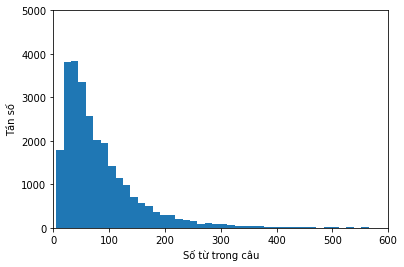

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(num_words, 100)
plt.xlabel('Số từ trong câu')
plt.ylabel('Tần số')
plt.axis([0, 600, 0, 5000])
plt.show()

Dựa trên biểu đồ histogram ở trên chúng ta có thể thấy chọn đặt giới hạn `MAX_SEQ_LENGTH` 200 là tương đối hợp lý.

In [ ]:
MAX_SEQ_LENGTH = 200

### Chuyển dữ liệu văn bản thành ma trận

Trong phần này, chúng ta sẽ tiến hành biến đổi text của review thành vector index của các từ trong `words_list`. Tập hợp các vector của `train_df` sẽ tạo thành ma trận `train_ids`

In [ ]:
def text2ids(df, max_length, _word_list):
    """
    Biến đổi các text trong dataframe thành ma trận index

    Parameters
    ----------
    df: DataFrame
        dataframe chứa các text cần biến đổi
    max_length: int
        độ dài tối đa của một text
    _word_list: numpy.array
        array chứa các từ trong word vectors

    Returns
    -------
    numpy.array
        len(df) x max_length contains indices of text
    """
    ids = np.zeros((len(df), max_length), dtype='int32')
    for idx, text in enumerate(tqdm(df['text'])):
        ids[idx,:] = get_sentence_indices(clean_sentences(text), max_length, _word_list)
    return ids

In [ ]:
# LƯU Ý: Bước thực hiện này tương đối mất thời gian (khoảng 5 phút)
# Nếu đã có file train_ids.npy rồi thì ra có thể load lên
# và sử dụng luôn ở bước tiếp theo

print("Converting train_df to train_ids...")
train_ids = text2ids(train_df, MAX_SEQ_LENGTH, words_list)
np.save('train_ids.npy', train_ids)


Converting train_df to train_ids...


In [ ]:
# Trường hợp đã tính toán và lưu ma trận rồi thì ta có thể load lên
train_ids = np.load('train_ids.npy')

In thử word indices của review đầu tiên:

In [ ]:
print('Word indices of the first review: ')
print(train_ids[0])


Word indices of the first review: 
[10774 11975  4826  7446  6880 10642  5767 18584 11975  7090  5284  8591
 15213 18109 10642 11022  4690 11975 16032 10630  2465 14595  2750  8231
  2563 10627  7733  9133  3513 19798  2876 10627  1047 12844 13512  7555
 14312 13245  3961   376 19772 15253 16614 17330 17016 10642 14598 15341
  3913 19519  9334 15522 13952 13245  5596 15221 12109 14341 14017   556
 17115 19151 18839 10346  9076 18584 11975  3364     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0    

### Chia dữ liệu thành train, validation và test

Chia dữ liệu `train_ids` và cột `class` của `train_df` thành 3 phần **train : validation : test = 0.8 : 0.1 : 0.1**

In [ ]:
train_x, test_validation_x, train_y, test_validation_y  = train_test_split(train_ids, train_df['class'], test_size=0.2, random_state=2019)
validation_x, test_x, validation_y, test_y = train_test_split(test_validation_x, test_validation_y, test_size=0.5, random_state=2018)

### TODO 2: Khởi tạo các `train_dataset`, `validation_dataset`, `test_dataset`

In [ ]:
BATCH_SIZE = 256 # Có thể chạy trên Tesla K80 12GB VRAM

In [ ]:
### TODO 2
# Sử dụng các biến đã tạo ở trên, hình thành 3 tập dataset
# train_dataset, validation_dataset, test_dataset
# trong đó mỗi tập dataset đều được chia thành các batch
#
# GỢI Ý:
# Cả 3 tập đều có quy trình tạo như nhau, chỉ khác về tham biến.
#
# Một dataset được tạo như sau:
# dataset_1 = tf.data.Dataset.from_tensor_slices((features,targets))
#
# Các dataset sau đó cần được chia thành batch.
# dataset_1 = dataset_1.batch(batch_size)
#
# Tham khảo: https://www.tensorflow.org/api_docs/python/tf/data/Dataset
### START CODE HERE
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y))
train_dataset = train_dataset.batch(BATCH_SIZE)

validation_dataset = tf.data.Dataset.from_tensor_slices((validation_x, validation_y))
validation_dataset = validation_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y))
test_dataset = test_dataset.batch(BATCH_SIZE)
### END CODE HERE

Chạy dòng lệnh sau để kiểm tra TODO 2:

In [ ]:
for idx, (x,y) in enumerate(train_dataset):
    if idx == 0:
        print('FIRST BATCH:')
        print('X =',x)
        print('y =',y)
print("Total: ", idx)

FIRST BATCH:
X = tf.Tensor(
[[12844  5596  4884 ...     0     0     0]
 [10774 16521 13952 ...     0     0     0]
 [ 7446 10698 10774 ...     0     0     0]
 ...
 [ 4884 16995  4601 ...     0     0     0]
 [ 3913 15085 14017 ...     0     0     0]
 [ 4788 14598   310 ...     0     0     0]], shape=(256, 200), dtype=int32)
y = tf.Tensor(
[0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1], shape=(256,), dtype=int64)
Total:  84


Nếu cài đặt đúng, kết quả sẽ có dạng như sau:
```
FIRST BATCH:
X = tf.Tensor(
[[12844  5596  4884 ...     0     0     0]
 [10774 16521 13952 ...     0     0     0]
 [ 7446 10698 10774 ...     0     0     0]
 ...
 [ 4884 16995  4601 ...     0     0     0]
 [ 3913 15085 14017 ...     0     0     0]
 [ 4788 14598   310 ...     0     0     0]], shape=(256, 200), dtype=int32)
y = tf.Tensor(
[0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1
 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1], shape=(256,), dtype=int32)
Total:  84
```

> *Câu hỏi phụ: số 84 trong kết quả trên nghĩa là gì? Liên hệ trở lại với BATCH_SIZE.*



### Tổng kết quá trình chuẩn bị dữ liệu huấn luyện

Quá trình kết hợp ma trận chỉ số (indices) và ma trận biểu diễn từ (word embeddings) sang data tensor dùng để huấn luyện được mô tả như hình dưới đây:
![caption](https://drive.google.com/uc?export=view&id=1SST9hIt4jboWYr4A41-wI2jMbKI25A9e)

Từ ma trận indices và ma trận embedding, sử dụng `tf.nn.embedding_lookup` ta thu được tensor có kích thước `(BATCH_SIZE, MAX_SEQUENCE_LENGTH, WORD_VEC_DIM)`.


In [ ]:
train_x[0]

array([12844,  5596,  4884, 16995,  3579,  8835,  5596,  5767,  5571,
       16893, 17572,  5519,  8926,  6361,  5767, 17572, 14017, 16521,
        5596,  4884, 13946,   432,  4639, 17572, 13946, 15200,  7456,
       10606,  9445,  8724, 13245,  2036,  6287,  5519,  5695, 11417,
        2036, 13245,  1516,  4884, 13045, 10376,  5519,  2212, 13946,
         184,  1880,  5596,  4884,   255, 16781, 15221,  2212, 12619,
       11777,  9261, 16781, 17677, 18393,   246,  5519,  4884,  4964,
        2212,  4639,  7446, 11694,  4884, 11439, 19898,  8262, 11975,
       13946, 11527,  3364, 18655, 19720, 13215,  3918,  9889,  5013,
        2750, 19193, 10376, 19151,  9962,  8071,  7900,  8136, 13315,
       14723,  5740,  5519,  9076,   119,  4884,  5695,  1355,  9809,
       15605,  8038,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [ ]:
tf.nn.embedding_lookup(word_vectors, train_x[0])

<tf.Tensor: shape=(200, 300), dtype=float32, numpy=
array([[ 0.0292, -0.0241,  0.0796, ...,  0.0008, -0.0218, -0.0077],
       [-0.0076, -0.0454,  0.0488, ..., -0.1456, -0.1232, -0.0259],
       [ 0.021 ,  0.0102,  0.0096, ...,  0.411 , -0.2519,  0.0151],
       ...,
       [ 0.1882, -0.292 ,  0.0072, ...,  0.5919, -0.3094, -0.1228],
       [ 0.1882, -0.292 ,  0.0072, ...,  0.5919, -0.3094, -0.1228],
       [ 0.1882, -0.292 ,  0.0072, ...,  0.5919, -0.3094, -0.1228]],
      dtype=float32)>

In [ ]:
for idx, (x,y) in enumerate(train_dataset):
    if idx == 0:
        print('EMBEDDING OF FIRST BATCH:')
        print(tf.nn.embedding_lookup(word_vectors, x))

EMBEDDING OF FIRST BATCH:
tf.Tensor(
[[[ 2.920e-02 -2.410e-02  7.960e-02 ...  8.000e-04 -2.180e-02 -7.700e-03]
  [-7.600e-03 -4.540e-02  4.880e-02 ... -1.456e-01 -1.232e-01 -2.590e-02]
  [ 2.100e-02  1.020e-02  9.600e-03 ...  4.110e-01 -2.519e-01  1.510e-02]
  ...
  [ 1.882e-01 -2.920e-01  7.200e-03 ...  5.919e-01 -3.094e-01 -1.228e-01]
  [ 1.882e-01 -2.920e-01  7.200e-03 ...  5.919e-01 -3.094e-01 -1.228e-01]
  [ 1.882e-01 -2.920e-01  7.200e-03 ...  5.919e-01 -3.094e-01 -1.228e-01]]

 [[-5.800e-03 -6.460e-02  1.976e-01 ... -1.739e-01  1.770e-02 -2.780e-02]
  [-6.140e-02  4.890e-02  8.530e-02 ... -3.620e-02  4.590e-02 -6.180e-02]
  [ 2.150e-02 -4.110e-02  2.015e-01 ... -9.910e-02 -4.840e-02  6.100e-03]
  ...
  [ 1.882e-01 -2.920e-01  7.200e-03 ...  5.919e-01 -3.094e-01 -1.228e-01]
  [ 1.882e-01 -2.920e-01  7.200e-03 ...  5.919e-01 -3.094e-01 -1.228e-01]
  [ 1.882e-01 -2.920e-01  7.200e-03 ...  5.919e-01 -3.094e-01 -1.228e-01]]

 [[ 4.510e-02 -2.430e-02  2.318e-01 ...  7.880e-02 -5.000e-

Chú ý vào phần shape của tensor output ở trên, ta có thể thấy kích thước của từng batch dữ liệu, tương ứng với hình minh họa trên.

Vậy là ta đã hoàn thành quá trình chuẩn bị dữ liệu!

Tiếp theo, ta sẽ xây dựng mô hình RNN để huấn luyện trên dữ liệu này.

## Xây dựng mô hình RNN

Trong bài tập này, ta sẽ sử dụng mạng Long Short-Term Memory (LSTM), một dạng kiến trúc RNN để gỉải quyết bài toán phân tích cảm xúc.

**Kiến trúc mạng LSTM** ta sẽ sử dụng trong bài tập này được mô tả như hình dưới. Để tăng độ phức tạp của mô hình, ta chồng nhiều tầng LSTM lên nhau (**Stacked LSTM layers**). Giữa tầng LSTM dưới và tầng LSTM trên, ta đặt một lớp dropout.

Việc chồng thêm các tầng LSTM sẽ giúp cho mô hình có khả năng học được các biểu diễn phức tạp hơn (tương tự như khi dùng nhiều tầng CNN), nhưng đồng thời cũng làm tăng số lượng tham số, đồng nghĩa với việc làm tăng thời gian huấn luyện.

![caption](https://drive.google.com/uc?export=view&id=10m5sPPmba__bHx6V9Wp3fp1Wot5uOhBG)

### Chọn  LSTM layer

Để hỗ trợ tốt nhất cho việc tính toán trên GPU, keras hỗ trợ hai loại LSTM layer: 1 loại dành được tối ưu cho các tính toán trên GPU, và một loại dành cho CPU.

In [ ]:
# NEW KERAS LSTM LAYER (suitable for both CPU and GPU): https://keras.io/api/layers/recurrent_layers/lstm/
lstm_layer = tf.keras.layers.LSTM

### TODO 3: Định nghĩa và tạo mô hình
Ở bước này, chúng ta cần định nghĩa mô hình `SentimentAnalysisModel`, kế thừa từ `tf.keras.Model`. Chúng ta sẽ áp dụng mô hình stacked LSTM ở trên để xây dựng `SentimentAnalysisModel`.

Các bạn theo dõi hướng dẫn cụ thể trong code ở dưới.

Hoàn thành hàm `__init__` để tạo định nghĩa của `class SentimentAnalysisModel`.

Hoàn thành hàm `call` để tạo lệnh feedforward khi gọi một `object` của `class SentimentAnalysisModel`.

In [ ]:
class SentimentAnalysisModel(tf.keras.Model):
    """
    Mô hình phân tích cảm xúc của câu

    Properties
    ----------
    word2vec: numpy.array
        word vectors
    lstm_layers: list
        list of lstm layers, lstm cuối cùng sẽ chỉ trả về output của lstm cuối cùng
    dropout_layers: list
        list of dropout layers
    dense_layer: Keras Dense Layer
        lớp dense layer cuối cùng nhận input từ lstm,
        đưa ra output bằng số lượng class thông qua hàm softmax
    """
    def __init__(self, word2vec, lstm_units, n_layers, num_classes, dropout_rate=0.25):
        """
        Khởi tạo mô hình

        Paramters
        ---------
        word2vec: numpy.array
            word vectors
        lstm_units: int
            số đơn vị lstm
        n_layers: int
            số layer lstm xếp chồng lên nhau
        num_classes: int
            số class đầu ra
        dropout_rate: float
            tỉ lệ dropout giữa các lớp
        """
        super().__init__(name='sentiment_analysis')

        # Khởi tạo các đặc tính của model
        self.word2vec = word2vec

        self.lstm_layers = []  # List chứa các tầng LSTM
        self.dropout_layers = []  # List chứa các tầng dropout

        ### TODO 3.1
        # Vòng lặp dưới chạy qua N tầng trong stack
        # mỗi tầng sẽ có 1 lstm_layer và 1 dropout_layer
        #
        # Khởi tạo lstm_layer như sau:
        # new_lstm = tf.keras.layers.LSTM(units=..., return_sequence=... )
        # Tham khảo: https://keras.io/api/layers/recurrent_layers/lstm/
        # LƯU Ý:
        # return_sequence của lstm_layer nhận giá trị True ở mọi tầng
        # trong stack, ngoại trừ tầng cuối cùngg
        #
        # Khởi tạo dropout_layer như sau:
        # new_dropout = tf.keras.layers.Dropout(rate=...)
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout
        #
        # Sau khi khởi tạo lstm_layer và dropout_layer
        # hãy thêm chúng vào 2 list tương ứng
        # self.lstm_layers và self.dropout_layers
        #
        # Cuối cùng, khởi tạo tầng fully-connected/dense
        # tf.keras.layers.Dense(num_classes=..., activation=' ')
        # Tham khảo: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
        #
        ### START CODE HERE
        for i in range(n_layers):
          if i == (n_layers - 1):
            flag = False
          else:
            flag = True
          new_lstm = tf.keras.layers.LSTM(units = lstm_units, return_sequences = flag)
          new_dropout = tf.keras.layers.Dropout(rate = dropout_rate)
          self.lstm_layers.append(new_lstm)
          self.dropout_layers.append(new_dropout)
        self.dense_layer = tf.keras.layers.Dense(units=num_classes, activation='softmax', name='dense_0')
        ### END CODE HERE

    def call(self, inputs):
        ### TODO 3.2
        # Thực hiện các bước biến đổi khi truyền thuận input qua mạng
        # Điền code vào các đoạn pass
        ### START CODE HERE
        # Input hiện là indices, cần chuyển sang dạng vector
        # sử dụng:
        # tf.nn.embedding_lookup(embeddings, indices)
        inputs = tf.nn.embedding_lookup(word_vectors, inputs)

        # Truyền thuận inputs lần lượt qua các tầng
        # ở mỗi tầng, truyền input qua các layer: lstm > dropout
        # vd: x = first_lstm(x)
        #     x = first_dropout(x)
        #     x = second_lstm(x)
        #     v.v.
        x = inputs
        for i in range(len(self.lstm_layers)):
          x = self.lstm_layers[i](x)
          x = self.dropout_layers[i](x)
        # Gán giá trị tầng cuối cùng vào out và trả về
        out = self.dense_layer(x)
        return out
        ### END CODE HERE


Tiếp theo, ta lựa chọn các hyperparameters (siêu tham số) phù hợp, rồi tạo mô hình dựa trên định nghĩa.

In [ ]:
# Các hyperparameters
LSTM_UNITS = 128
N_LAYERS = 3
NUM_CLASSES = 2

In [ ]:
model = SentimentAnalysisModel(word_vectors, LSTM_UNITS, N_LAYERS, NUM_CLASSES)

##### SANITY CHECK FOR TODO3

In [ ]:
# Expected output is a Tensor of shape (5,2)
# corresponding to the probability of classes 0 and 1, ie. negative and positive, for 5 samples
model(train_x[0:5])

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[0.4362404 , 0.5637596 ],
       [0.43624026, 0.56375974],
       [0.43624026, 0.5637597 ],
       [0.43624026, 0.56375974],
       [0.43624026, 0.56375974]], dtype=float32)>

In [ ]:
train_x[0:5].shape

(5, 200)

> *Câu hỏi phụ: Hãy thử ước tính xem mô hình với các siêu tham số trên sẽ có bao nhiêu tham số cần huấn luyện, với kích thước input là 200? Kiểm tra bằng `model.summary()`.*


In [ ]:
model.summary()

Model: "sentiment_analysis"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                multiple                  219648    
_________________________________________________________________
lstm_5 (LSTM)                multiple                  131584    
_________________________________________________________________
lstm_6 (LSTM)                multiple                  131584    
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
dense_0 (Dense)              multiple           

In [ ]:
model.summary()

Model: "sentiment_analysis"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                multiple                  219648    
_________________________________________________________________
lstm_5 (LSTM)                multiple                  131584    
_________________________________________________________________
lstm_6 (LSTM)                multiple                  131584    
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dropout_5 (Dropout)          multiple                  0         
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
dense_0 (Dense)              multiple           

### Huấn luyện mô hình

Ở bài tập 3 (CNN), ta đã sử dụng hàm `fit` của keras model trong quá trình huấn luyện.

Ở bài tập này, quá trình huấn luyện được thực hiện ở cấp độ thấp hơn (lower level), và ta sẽ đi qua từng bước: **truyền thuận**, **truyền ngược**, và **tối ưu hoá**

Đầu tiên, chọn các tham số huấn luyện:

In [ ]:
LEARNING_RATE = 0.001
EPOCHS = 100

Ta sẽ sử dụng thuật toán tối ưu hoá Adam với learning rate là `LEARNING_RATE`:

> Tham khảo thêm về Adam ở các link dưới:
>  * tiếng Anh: https://ml-cheatsheet.readthedocs.io/en/latest/optimizers.html#adam
>  * tiếng Anh: http://ruder.io/optimizing-gradient-descent/index.html#adam
>  * tiếng Việt: https://viblo.asia/p/thuat-toan-toi-uu-adam-aWj53k8Q56m



In [ ]:
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

Các biến khác hỗ trợ cho việc huấn luyện:

In [ ]:
# Thư mục chứa checkpoint
checkpoint_dir = './model'
# Mẫu tên checkpoint
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{score}")

#### TODO 4: Viết hàm huấn luyện từng epoch

Trước tiên, ta sẽ import vài thành phần từ thư viện `fastprogress` để tiện cho việc biểu diễn
quy trình huấn luyện:

In [ ]:
from fastprogress import master_bar, progress_bar

Ta cần xây dựng hàm `epoch_training`, thực hiện các bước **truyền thuận**, **truyền ngược** và **tối ưu hóa** tại mỗi epoch.

Hàm `epoch_training`:
* nhận các tham biến `model`, `dataset`, `mb`, và `num_step`
* trả về giá trị loss trung bình của model

In [ ]:
def epoch_training(model, dataset, mb, num_step):
    """
    Huấn luyện mô hình trong 1 epoch

    Parameters
    ----------
    model: tf.keras.Model
        model cần huấn luyện
    dataset: tf.Dataset
        dataset dùng để huấn luyện
    mb: fastprogress.master_bar
        thanh biểu diễn tiến độ
    num_step: int
        số bước lặp trong mỗi epoch
    Returns
    -------
    float
        Giá trị loss trung bình của epoch
    """
    train_losses = [] # Chứa giá trị loss của các batch
    dataset_iter = iter(dataset)
    lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    for batch in progress_bar(range(num_step), parent=mb):
        inp, target = next(dataset_iter)
        ### TODO 4
        # tham khảo cách dùng tf.GradientTape ở def train_step()
        # ở link https://www.tensorflow.org/guide/migrate#customize_the_training_step
        with tf.GradientTape() as tape:

            ### TODO 4.1
            # Truyền thuận - Feedforward
            # Để tạo giá trị predictions
            ### START CODE HERE
            predictions = model(inp, training = True)
            ### END CODE HERE

            ### TODO 4.2
            # Tính loss giữa target và predictions
            # sử dụng hàm loss sparse_softmax_cross_entropy
            ### START CODE HERE
            total_loss = lossfunc(target, predictions)
            ### END CODE HERE

            # Thêm loss của batch vào train_losses
            train_losses.append(total_loss)



        ### TODO 4.3
        # Tính gradient của loss theo các tham số của mô hình
        ### START CODE HERE
        gradient = tape.gradient(total_loss, model.trainable_variables)
        ### END CODE HERE

        ### TODO 4.4
        # Dùng gradient để tối ưu các tham số
        ### START CODE HERE
        optimizer.apply_gradients(zip(gradient, model.trainable_variables))
        ### END CODE HERE

        mb.child.comment = 'Train loss {:.4f}'.format(total_loss)

    # Trả về loss trung bình
    return sum(train_losses)/ len(train_losses)

#### SANITY CHECK FOR TODO 4

In [ ]:
# Test epoch_training() over one trial epoch
mb = master_bar(range(1))
for epoch in mb:
  print(epoch_training(model, train_dataset, mb, math.ceil(len(train_x)*1.0/BATCH_SIZE)))

tf.Tensor(0.7059678, shape=(), dtype=float32)


#### TODO 5: Viết hàm đánh giá từng epoch

Ta cần xây dựng hàm `epoch_evaluation`, thực hiện duy nhất bước **truyền thuận** để tính loss.

Hàm `epoch_evaluation`:
* nhận vào `model`, `dataset`, `mb`, và `num_step`
* trả về giá trị `loss`, `f1_score` của model trên tập `dataset`

In [ ]:
def epoch_evaluation(model, dataset, mb, num_step):
    """
    Đánh giá mô hình qua 1 epoch

    Parameters
    ----------
    model: tf.keras.Model
        model cần đánh giá
    dataset: tf.Dataset
        dataset cần đánh giá
    mb: fastprogress.master_bar
        progess bar
    num_step: int
        số bước lặp trong mỗi epoch
    Returns
    -------
    float
        Giá trị loss trung bình của epoch
    float
        Giá trị F1-score trên tập validation
    """
    val_losses = []   # Chứa giá trị loss của các batch
    val_gt = []       # Chứa giá trị nhãn thật của tập validation , gt = groundtruth
    val_pred = []     # Chứa giá trị nhãn dự đoán do model trên tập validation
    dataset_iter = iter(dataset)
    lossfunc = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
    for batch in progress_bar(range(num_step), parent=mb):
        inp, target = next(dataset_iter)

        val_gt.extend(target.numpy().astype(np.int32).tolist())
        ### TODO 5.1
        # Truyền thuận
        # để lấy predictions
        ### START CODE HERE
        predictions = model(inp, training = True)
        ### END CODE HERE

        ### TODO 5.2
        # Tính loss giữa target và predictions
        # sử dụng hàm loss sparse_softmax_cross_entropy
        ### START CODE HERE
        loss = lossfunc(target, predictions)
        ### END CODE HERE


        # Thêm loss vào val_losses
        val_losses.append(loss)
        val_pred.extend(tf.argmax(predictions,1).numpy().astype(np.int32).tolist())

        mb.child.comment = 'Validation loss {:.4f}'.format(loss)
    # Trả về loss trung bình và F1-score
    return sum(val_losses) / len(val_losses), f1_score(val_gt, val_pred)

#### SANITY CHECK FOR TODO 5

In [ ]:
# Test epoch_evaluation() over one trial epoch
mb = master_bar(range(1))
for epoch in mb:
  val_loss, val_score = epoch_evaluation(model, validation_dataset, mb, math.ceil(len(validation_x)*1.0/BATCH_SIZE))
print(val_loss)
print(val_score)

tf.Tensor(0.69755286, shape=(), dtype=float32)
0.6444212721584984


#### TODO 6: Thiết lập quy trình huấn luyện


Khi đã chuẩn bị xong hàm huấn luyện và đánh giá cho mỗi epoch, ta có thể thiết lập quy trình huấn luyện chính.

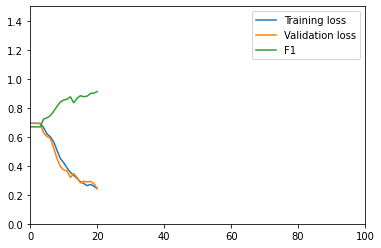

In [ ]:
best_score = 0
mb = master_bar(range(EPOCHS))
mb.names = ['Training loss', 'Validation loss', 'F1']
training_losses = []
validation_losses = []
f1_scores = []
x = []

train_step = math.ceil(len(train_x)*1.0/BATCH_SIZE)
val_step = math.ceil(len(validation_x)*1.0/BATCH_SIZE)
for epoch in mb:
    # initializing the hidden state at the start of every epoch
    # initally hidden is None
    hidden = model.reset_states()
    x.append(epoch)

    ### TODO 6.1
    # Huấn luyện bằng hàm epoch_training()
    # Sử dụng tập train_dataset epoch_training(model, dataset, mb, num_step)
    ### START CODE HERE
    training_loss = epoch_training(model, train_dataset, mb, train_step)
    ### END CODE HERE

    # Báo cáo kết quả train/huấn luyện
    mb.write('Finish train epoch {} with loss {:.4f}'.format(epoch, training_loss))
    training_losses.append(training_loss)

    ### TODO 6.2
    # Đánh giá kết quả trên tập validation_dataset
    # bằng hàm epoch_evaluation() epoch_evaluation(model, dataset, mb, num_step):
    ### START CODE HERE
    valid_loss, valid_score = epoch_evaluation(model, train_dataset, mb, train_step)
    ### END CODE HERE

    # Báo cáo kết quả validate
    mb.write('Finish validate epoch {} with loss {:.4f}, F1-score {:.4f}'.format(epoch,valid_loss, valid_score))
    validation_losses.append(valid_loss)
    f1_scores.append(valid_score)

    # Cập nhật đồ thị
    mb.update_graph([[x, training_losses], [x, validation_losses], [x, f1_scores]], [0,EPOCHS], [0,1.5])

    # Update score và lưu model có score tốt nhất
    if best_score < valid_score:
        mb.write(">>> Improved F1-score from {:.4f} to {:.4f}".format(best_score, valid_score))
        # Update best_score
        best_score = valid_score
        # Save model
        model.save_weights(checkpoint_prefix.format(score=valid_score))



### Đánh giá mô hình trên tập test có nhãn

Sau khi hoàn thành quá trình huấn luyện, ta sẽ đánh giá mô hình trên tập test đã chia ra từ dữ liệu có nhãn. Ta sử dụng thang điểm F1 để đánh giá độ chính xác của mô hình.

> Tham khảo về định nghĩa F1-score ở đây: https://machinelearningcoban.com/2017/08/31/evaluation/#-f-score
![alt text](https://machinelearningcoban.com/assets/33_evaluation/PR.png)

Nếu được huấn luyện đúng cách thì kết quả F1 ở phần này sẽ rơi vào khoảng 70-80% trở lên.

In [ ]:
mb = master_bar(range(1))
for i in mb:
  test_loss, test_score = epoch_evaluation(model, test_dataset, mb, math.ceil(len(test_x)*1.0/BATCH_SIZE))
print("F1-score on test set:", test_score)

## Predict trên 3000 mẫu bình luận không nhãn

Đã xong quá trình huấn luyện và kiểm định mô hình trên dữ liệu có nhãn.

Nếu thực hiện tốt các bài tập ở trên, thì đến đây bạn đã có một mô hình có thể phân tích cảm xúc tiêu cực/tích cực của một đoạn văn bản tiếng Việt bất kì!

(Tuy nhiên, nếu văn bản đó không phải là bình luận về địa điểm ăn uống thì mô hình sẽ khó lòng dự đoán chính xác, bởi dữ liệu mà ta dùng để huấn luyện chỉ nằm trong miền các bình luận đánh giá quán ăn. Có thể nói là mô hình của chúng ta chỉ có tri thức chuyên biệt về địa điểm ăn uống.)

Việc cuối cùng là áp dụng mô hình để suy đoán cảm xúc của các mẫu bình luận không nhãn.

In [ ]:
#Các bình luận không nhãn
test_df.head(10)

### TODO 7: Xây dựng hàm `predict`

Ta cần viết một hàm nhận vào một câu/đoạn bình luận tiếng Việt, và trả về một trong 2 giá trị cảm xúc positive hoặc negative.

Cần lưu ý: các dữ liệu không nhãn chưa được tách thành từ nên các bạn cần sử dụng các thư viện hỗ trợ tokenize tiếng Việt (ví dụ underthesea) để tiền xử lý trong hàm `predict`

In [ ]:
try:
    from underthesea import word_tokenize
except:
    !pip install underthesea
    from underthesea import word_tokenize

In [ ]:
def predict(sentence, model, _word_list=words_list, _max_seq_length=MAX_SEQ_LENGTH):
    """
    Dự đoán cảm xúc của một câu

    Parameters
    ----------
    sentence: str
        câu cần dự đoán
    model: model keras
        model keras đã được train/ load trọng số vừa train
    _word_list: numpy.array
        danh sách các từ đã biết
    _max_seq_length: int
        giới hạn số từ tối đa trong mỗi câu

    Returns
    -------
    int
        0 nếu là negative, 1 nếu là positive
    """
    ### TODO 7.1
    # Tokenize/Tách từ trong câu
    # Sử dụng hàm word_tokenize vừa import ở trên
    ### START CODE HERE
    sentence = word_tokenize(sentence, format = 'text')
    ### END CODE HERE

    ### TODO 7.2
    # Đưa câu đã tokenize về dạng input_data thích hợp để truyền vào model
    ### START CODE HER
    inp = [get_sentence_indices(sentence, _max_seq_length,  _word_list)]
    ### END CODE HERE


    ### TODO 7.3
    # Truyền input_data qua model để nhận về xác suất các nhãn
    # Chọn nhãn có xác suất cao nhất và return
    ### START CODE HERE
    out = model(inp)
    if out[0][1] > out[0][0]:
      predictions = 1
    else:
      predictions = 0
    return predictions
    ### END CODE HERE

In [ ]:
word_tokenize('nhà hàng nay ngon')

In [ ]:
word_tokenize('nhà hàng nay ngon', format='text')

In [ ]:
test_df['text'][0]

In [ ]:
train_df['text'][0]

Load trọng số model đã train:

In [ ]:
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

Kiểm tra hàm vừa cài đặt, nếu cài đặt hàm và huấn luyện đúng thì kết quả lần lượt **_nên_** là 0 và 1.

In [ ]:
print("Test 1:",predict("Quán này rất dở", model))
print("Test 2:",predict("Quán này rất ngon", model))

### Ghi kết quả

Đọc file `sample_submission.csv`

In [ ]:
submission = pd.read_csv(data_dir+"/sample_submission.csv", index_col=0)
submission.head()

Duyệt từng dòng trong DataFrame `test_df` và dự đoán sau đó cập nhật kết quả vào `submission`

In [ ]:
for _, row in tqdm(test_df.iterrows()):
    submission.loc[row.id] = predict(row.text, model)

In [ ]:
submission.head(20)

### Nộp bài

Xuất ra file `submission.csv`.

In [ ]:
submission.to_csv('submission.csv')

Các bạn nộp file submission lên [Kaggle competition](https://www.kaggle.com/c/vietai-f7-assignment-4/)